In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Function to load tweets along with their label and id
def load_data(path):
  return pd.read_csv(path)[["id","tweets","label"]]

In [ ]:
## Load the preprocessed tweets
# tweets=load_data("https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_a47a32f4144e4c0b9bf5505967c87853.csv")
# test_tweets = pd.read_csv('https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_8fcf459d1c1b4906a9e488335bdc9dec.csv')

## Loading Individual Disaster Data 
earthquake_tweets=load_data("https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_a47a32f4144e4c0b9bf5505967c87853.csv")
floods_tweets=load_data("https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_b0834f4bc821415e82a5981cf251a69d.csv")
hurricane_tweets=load_data("https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_6e3a5a63ab3a4b8eaa37ae30f736f0ae.csv")
combined_tweets=load_data("https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_520705b60d3149cf990572133108dffc.csv")



Data Analysis

https://colab.research.google.com/drive/1DLoVMkGTGFtNh9nAFCq4ppe_4K8ETono?usp=sharing

In [ ]:
import nltk
nltk.download('stopwords')
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
X_train_earthquake, X_test_earthquake, y_train_earthquake, y_test_earthquake = train_test_split(earthquake_tweets[['id','tweets']], earthquake_tweets[['id','label']], test_size=0.2, shuffle=False)
X_train_floods, X_test_floods, y_train_floods, y_test_floods = train_test_split(floods_tweets[['id','tweets']], floods_tweets[['id','label']], test_size=0.2, shuffle=False)
X_train_hurricane, X_test_hurricane, y_train_hurricane, y_test_hurricane = train_test_split(hurricane_tweets[['id','tweets']], hurricane_tweets[['id','label']], test_size=0.2, shuffle=False)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_tweets[['id','tweets']], combined_tweets[['id','label']], test_size=0.2, shuffle=False)


##Model Trained on Earthquake data

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])
def get_encoding_per_tweet(tweet):
  encoding=[]
  tweet=tweet.lower()

  # TWEET RELATED TO EARTHQUAKE
  if "earthquake" in tweet:
    encoding.append(1)
  else:
    encoding.append(0)

  # TWEETS RELATED TO INJURIES AND DEATHS
  if "death" in tweet and "toll" in tweet or 'victim' in tweet or "injur" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  encoding.append(get_vader_score(tweet))

  if "dozens" in tweet or "thousands" in tweet or  "hundreds" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding

  #TWEETS RELATED TO MISSING OR MISPLACED PEOPLE
  if "miss" in tweet or "evacuat" in tweet or "displac" in tweet or "lost" in tweet or "relocat" in tweet :
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  
  #TWEETS THAT TALK ABOUT FIRES AND TSUNAMI
  if "fire" in tweet or "tsunami" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  
  return encoding


## Get Encodings for all tweets [train or test, whichever supplied]
def get_encoding_for_data(data):
  X=[]
  # Get encoding for each tweet in the data(set of tweets)
  for tweet_id,tweet in zip(data['id'],data['tweets']):
    X.append(get_encoding_per_tweet(tweet))
  return X



X_train_earthquake['tweets'] = X_train_earthquake['tweets'].apply(lambda x: x.lower())
X_test_earthquake['tweets'] = X_test_earthquake['tweets'].apply(lambda x:x.lower())
X_test_floods['tweets'] = X_test_floods['tweets'].apply(lambda x:x.lower())
X_test_hurricane['tweets'] = X_test_hurricane['tweets'].apply(lambda x:x.lower())
X_test_combined['tweets'] = X_test_combined['tweets'].apply(lambda x:x.lower())


def remove_stopwords(tweet, stopwords_list):
  tweet = tweet.split()
  fin_list = []
  for word in tweet:
    if word not in stopwords_list:
      fin_list.append(word)
  
  updated_sent = " "
  updated_sent = updated_sent.join(fin_list)
  return updated_sent

def pos_selection(tweet):
  pos_list=pos(tweet)
  tweet = tweet.split()
  fin_list = []
  for tag,word in zip(pos_list,tweet):
    if "VB" in tag or "JJ" in tag or "RB" in tag or "NN" in tag:
      if "NNP" not in tag: 
        fin_list.append(word)
  
  updated_sent = " "
  updated_sent = updated_sent.join(fin_list)
  return updated_sent


X_train_earthquake['tweets'] = X_train_earthquake['tweets'].apply(lambda x: pos_selection(x))
X_test_earthquake['tweets'] = X_test_earthquake['tweets'].apply(lambda x:pos_selection(x))
X_test_floods['tweets'] = X_test_floods['tweets'].apply(lambda x:pos_selection(x))
X_test_hurricane['tweets'] = X_test_hurricane['tweets'].apply(lambda x:pos_selection(x))
X_test_combined['tweets'] = X_test_combined['tweets'].apply(lambda x:pos_selection(x))

# tweets['tweets'] = tweets['tweets'].apply(lambda x: pos_selection(x))
# tweets['tweets'] = tweets['tweets'].apply(lambda x: remove_stopwords(x,lst_stopwords))
# test_tweets['tweets'] = test_tweets['tweets'].apply(lambda x: remove_stopwords(x,lst_stopwords))



from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2,max_df=0.5, ngram_range=(1,3))
model=tfidf.fit(X_train_earthquake['tweets'])
features=model.transform(X_train_earthquake['tweets'])
features_test_earthquake=model.transform(X_test_earthquake['tweets'])
features_test_floods=model.transform(X_test_floods['tweets'])
features_test_hurricane=model.transform(X_test_hurricane['tweets'])
features_test_combined=model.transform(X_test_combined['tweets'])

x_train=features
x_test_earthquake=features_test_earthquake
x_test_floods=features_test_floods
x_test_hurricane=features_test_hurricane
x_test_combined=features_test_combined


# x_new_test=model.transform(test_tweets['tweets'])


# REMOVING LOW VARIANCE FEATURES
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold = 0.0002)
constant_filter.fit(x_train)
# feature_list = x_train
# print('Number of selected features: ' ,len(list(feature_list)),'\n')
# print('List of selected features: \n' ,list(feature_list))


x_train_filter = constant_filter.transform(x_train)
x_test_filter_earthquake = constant_filter.transform(x_test_earthquake)
x_test_filter_floods = constant_filter.transform(x_test_floods)
x_test_filter_hurricane = constant_filter.transform(x_test_hurricane)
x_test_filter_combined = constant_filter.transform(x_test_combined)

# x_new_test_filter = constant_filter.transform(x_new_test)
# x_train_filter.shape, x_test_filter.shape, x_train.shape,x_new_test_filter.shape

x_train_filter = pd.DataFrame(x_train_filter.toarray())
x_test_filter_earthquake = pd.DataFrame(x_test_filter_earthquake.toarray())
x_test_filter_floods = pd.DataFrame(x_test_filter_floods.toarray())
x_test_filter_hurricane = pd.DataFrame(x_test_filter_hurricane.toarray())
x_test_filter_combined = pd.DataFrame(x_test_filter_combined.toarray())


# x_new_test_filter = pd.DataFrame(x_new_test_filter.toarray())


def get_correlation(data, threshold):
    corr_col = set()
    cormat = data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j]) > threshold:
                colname = cormat.columns[i]
                corr_col.add(colname)
    return corr_col
corr_features = get_correlation(x_train_filter, 0.70)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
x_train_uncorr = x_train_filter.drop(labels= corr_features, axis = 1)
x_test_uncorr_earthquake = x_test_filter_earthquake.drop(labels= corr_features, axis = 1)
x_test_uncorr_floods = x_test_filter_floods.drop(labels= corr_features, axis = 1)
x_test_uncorr_hurricane = x_test_filter_hurricane.drop(labels= corr_features, axis = 1)
x_test_uncorr_combined = x_test_filter_combined.drop(labels= corr_features, axis = 1)

# x_new_test_uncorr = x_new_test_filter.drop(labels= corr_features, axis = 1)

x_train_uncorr = pd.DataFrame(x_train_uncorr)
x_test_uncorr_earthquake = pd.DataFrame(x_test_uncorr_earthquake)
x_test_uncorr_floods = pd.DataFrame(x_test_uncorr_floods)
x_test_uncorr_hurricane = pd.DataFrame(x_test_uncorr_hurricane)
x_test_uncorr_combined = pd.DataFrame(x_test_uncorr_combined)

# x_new_test_uncorr = pd.DataFrame(x_new_test_uncorr)
# x_train_uncorr.shape, x_test_uncorr.shape, x_new_test_uncorr.shape

In [ ]:
x_train_uncorr=pd.concat([x_train_uncorr,pd.DataFrame(get_encoding_for_data(X_train_earthquake),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_earthquake=pd.concat([x_test_uncorr_earthquake,pd.DataFrame(get_encoding_for_data(X_test_earthquake),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_floods=pd.concat([x_test_uncorr_floods,pd.DataFrame(get_encoding_for_data(X_test_floods),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_hurricane=pd.concat([x_test_uncorr_hurricane,pd.DataFrame(get_encoding_for_data(X_test_hurricane),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_combined=pd.concat([x_test_uncorr_combined,pd.DataFrame(get_encoding_for_data(X_test_combined),columns=['a','b','c','d','e','f'])],axis=1)



In [ ]:
## Train with SVM
from sklearn import svm
# Can be used to get a rough estimate of score, later we use grid search to find better parameters
clf = svm.SVC(cache_size=10000,class_weight="balanced")
# Fit over encodings and labels(binary labels) of the data
clf.fit(x_train_uncorr, y_train_earthquake["label"]) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC(cache_size=10000, class_weight='balanced')

------------ON EARTHQUAKE DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.9480    0.9118    0.9295      1360
           1     0.6962    0.8017    0.7453       343

    accuracy                         0.8896      1703
   macro avg     0.8221    0.8568    0.8374      1703
weighted avg     0.8973    0.8896    0.8924      1703

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON FLOODS DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8505    0.9384    0.8922       503
           1     0.8098    0.6140    0.6984       215

    accuracy                         0.8412       718
   macro avg     0.8301    0.7762    0.7953       718
weighted avg     0.8383    0.8412    0.8342       718

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON HURRICANE DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8975    0.9471    0.9216       832
           1     0.7528    0.5982    0.6667       224

    accuracy                         0.8731      1056
   macro avg     0.8252    0.7727    0.7942      1056
weighted avg     0.8668    0.8731    0.8676      1056

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON COMBINED DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8065    0.9379    0.8673      1982
           1     0.8950    0.7015    0.7865      1494

    accuracy                         0.8363      3476
   macro avg     0.8507    0.8197    0.8269      3476
weighted avg     0.8445    0.8363    0.8326      3476

X-axis: Obtained Labels Y-axis: Actual Labels


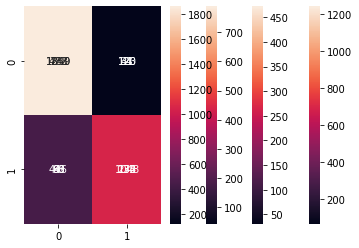

In [ ]:
## Get predictions and obtain scores and confusion matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("------------ON EARTHQUAKE DATA--------------")
predictions= clf.predict(x_test_uncorr_earthquake)
print(classification_report(y_test_earthquake['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_earthquake['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON FLOODS DATA--------------")
predictions= clf.predict(x_test_uncorr_floods)
print(classification_report(y_test_floods['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_floods['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON HURRICANE DATA--------------")
predictions= clf.predict(x_test_uncorr_hurricane)
print(classification_report(y_test_hurricane['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_hurricane['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON COMBINED DATA--------------")
predictions= clf.predict(x_test_uncorr_combined)
print(classification_report(y_test_combined['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_combined['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

##Model Trained on Floods Data

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])
def get_encoding_per_tweet(tweet):
  encoding=[]
  tweet=tweet.lower()

  # TWEET RELATED TO EARTHQUAKE
  if "earthquake" in tweet:
    encoding.append(1)
  else:
    encoding.append(0)

  # TWEETS RELATED TO INJURIES AND DEATHS
  if "death" in tweet and "toll" in tweet or 'victim' in tweet or "injur" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  encoding.append(get_vader_score(tweet))

  if "dozens" in tweet or "thousands" in tweet or  "hundreds" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding

  #TWEETS RELATED TO MISSING OR MISPLACED PEOPLE
  if "miss" in tweet or "evacuat" in tweet or "displac" in tweet or "lost" in tweet or "relocat" in tweet :
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  
  #TWEETS THAT TALK ABOUT FIRES AND TSUNAMI
  if "fire" in tweet or "tsunami" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  
  return encoding


## Get Encodings for all tweets [train or test, whichever supplied]
def get_encoding_for_data(data):
  X=[]
  # Get encoding for each tweet in the data(set of tweets)
  for tweet_id,tweet in zip(data['id'],data['tweets']):
    X.append(get_encoding_per_tweet(tweet))
  return X



X_train_floods['tweets'] = X_train_floods['tweets'].apply(lambda x: x.lower())
X_test_earthquake['tweets'] = X_test_earthquake['tweets'].apply(lambda x:x.lower())
X_test_floods['tweets'] = X_test_floods['tweets'].apply(lambda x:x.lower())
X_test_hurricane['tweets'] = X_test_hurricane['tweets'].apply(lambda x:x.lower())
X_test_combined['tweets'] = X_test_combined['tweets'].apply(lambda x:x.lower())


def remove_stopwords(tweet, stopwords_list):
  tweet = tweet.split()
  fin_list = []
  for word in tweet:
    if word not in stopwords_list:
      fin_list.append(word)
  
  updated_sent = " "
  updated_sent = updated_sent.join(fin_list)
  return updated_sent

def pos_selection(tweet):
  pos_list=pos(tweet)
  tweet = tweet.split()
  fin_list = []
  for tag,word in zip(pos_list,tweet):
    if "VB" in tag or "JJ" in tag or "RB" in tag or "NN" in tag:
      if "NNP" not in tag: 
        fin_list.append(word)
  
  updated_sent = " "
  updated_sent = updated_sent.join(fin_list)
  return updated_sent


X_train_floods['tweets'] = X_train_floods['tweets'].apply(lambda x: pos_selection(x))
X_test_earthquake['tweets'] = X_test_earthquake['tweets'].apply(lambda x:pos_selection(x))
X_test_floods['tweets'] = X_test_floods['tweets'].apply(lambda x:pos_selection(x))
X_test_hurricane['tweets'] = X_test_hurricane['tweets'].apply(lambda x:pos_selection(x))
X_test_combined['tweets'] = X_test_combined['tweets'].apply(lambda x:pos_selection(x))

# tweets['tweets'] = tweets['tweets'].apply(lambda x: pos_selection(x))
# tweets['tweets'] = tweets['tweets'].apply(lambda x: remove_stopwords(x,lst_stopwords))
# test_tweets['tweets'] = test_tweets['tweets'].apply(lambda x: remove_stopwords(x,lst_stopwords))



from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2,max_df=0.5, ngram_range=(1,3))
model=tfidf.fit(X_train_floods['tweets'])
features=model.transform(X_train_floods['tweets'])
features_test_earthquake=model.transform(X_test_earthquake['tweets'])
features_test_floods=model.transform(X_test_floods['tweets'])
features_test_hurricane=model.transform(X_test_hurricane['tweets'])
features_test_combined=model.transform(X_test_combined['tweets'])

x_train=features
x_test_earthquake=features_test_earthquake
x_test_floods=features_test_floods
x_test_hurricane=features_test_hurricane
x_test_combined=features_test_combined


# x_new_test=model.transform(test_tweets['tweets'])


# REMOVING LOW VARIANCE FEATURES
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold = 0.0002)
constant_filter.fit(x_train)
# feature_list = x_train
# print('Number of selected features: ' ,len(list(feature_list)),'\n')
# print('List of selected features: \n' ,list(feature_list))


x_train_filter = constant_filter.transform(x_train)
x_test_filter_earthquake = constant_filter.transform(x_test_earthquake)
x_test_filter_floods = constant_filter.transform(x_test_floods)
x_test_filter_hurricane = constant_filter.transform(x_test_hurricane)
x_test_filter_combined = constant_filter.transform(x_test_combined)

# x_new_test_filter = constant_filter.transform(x_new_test)
# x_train_filter.shape, x_test_filter.shape, x_train.shape,x_new_test_filter.shape

x_train_filter = pd.DataFrame(x_train_filter.toarray())
x_test_filter_earthquake = pd.DataFrame(x_test_filter_earthquake.toarray())
x_test_filter_floods = pd.DataFrame(x_test_filter_floods.toarray())
x_test_filter_hurricane = pd.DataFrame(x_test_filter_hurricane.toarray())
x_test_filter_combined = pd.DataFrame(x_test_filter_combined.toarray())


# x_new_test_filter = pd.DataFrame(x_new_test_filter.toarray())


def get_correlation(data, threshold):
    corr_col = set()
    cormat = data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j]) > threshold:
                colname = cormat.columns[i]
                corr_col.add(colname)
    return corr_col
corr_features = get_correlation(x_train_filter, 0.70)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
x_train_uncorr = x_train_filter.drop(labels= corr_features, axis = 1)
x_test_uncorr_earthquake = x_test_filter_earthquake.drop(labels= corr_features, axis = 1)
x_test_uncorr_floods = x_test_filter_floods.drop(labels= corr_features, axis = 1)
x_test_uncorr_hurricane = x_test_filter_hurricane.drop(labels= corr_features, axis = 1)
x_test_uncorr_combined = x_test_filter_combined.drop(labels= corr_features, axis = 1)

# x_new_test_uncorr = x_new_test_filter.drop(labels= corr_features, axis = 1)

x_train_uncorr = pd.DataFrame(x_train_uncorr)
x_test_uncorr_earthquake = pd.DataFrame(x_test_uncorr_earthquake)
x_test_uncorr_floods = pd.DataFrame(x_test_uncorr_floods)
x_test_uncorr_hurricane = pd.DataFrame(x_test_uncorr_hurricane)
x_test_uncorr_combined = pd.DataFrame(x_test_uncorr_combined)

# x_new_test_uncorr = pd.DataFrame(x_new_test_uncorr)
# x_train_uncorr.shape, x_test_uncorr.shape, x_new_test_uncorr.shape

In [ ]:
x_train_uncorr=pd.concat([x_train_uncorr,pd.DataFrame(get_encoding_for_data(X_train_floods),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_earthquake=pd.concat([x_test_uncorr_earthquake,pd.DataFrame(get_encoding_for_data(X_test_earthquake),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_floods=pd.concat([x_test_uncorr_floods,pd.DataFrame(get_encoding_for_data(X_test_floods),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_hurricane=pd.concat([x_test_uncorr_hurricane,pd.DataFrame(get_encoding_for_data(X_test_hurricane),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_combined=pd.concat([x_test_uncorr_combined,pd.DataFrame(get_encoding_for_data(X_test_combined),columns=['a','b','c','d','e','f'])],axis=1)



In [ ]:
## Train with SVM
from sklearn import svm
# Can be used to get a rough estimate of score, later we use grid search to find better parameters
clf = svm.SVC(cache_size=10000,class_weight="balanced")
# Fit over encodings and labels(binary labels) of the data
clf.fit(x_train_uncorr, y_train_floods["label"]) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC(cache_size=10000, class_weight='balanced')

------------ON EARTHQUAKE DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8251    0.9713    0.8923      1360
           1     0.6176    0.1837    0.2831       343

    accuracy                         0.8127      1703
   macro avg     0.7214    0.5775    0.5877      1703
weighted avg     0.7833    0.8127    0.7696      1703

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON FLOODS DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8407    0.9443    0.8895       503
           1     0.8170    0.5814    0.6793       215

    accuracy                         0.8357       718
   macro avg     0.8289    0.7629    0.7844       718
weighted avg     0.8336    0.8357    0.8266       718

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON HURRICANE DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8531    0.9772    0.9109       832
           1     0.8155    0.3750    0.5138       224

    accuracy                         0.8494      1056
   macro avg     0.8343    0.6761    0.7123      1056
weighted avg     0.8451    0.8494    0.8267      1056

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON COMBINED DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8840    0.9460    0.9140      1982
           1     0.9210    0.8353    0.8761      1494

    accuracy                         0.8984      3476
   macro avg     0.9025    0.8907    0.8950      3476
weighted avg     0.8999    0.8984    0.8977      3476

X-axis: Obtained Labels Y-axis: Actual Labels


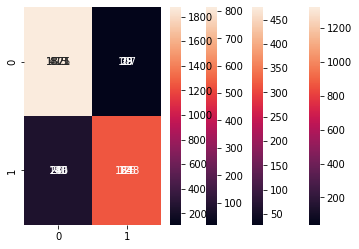

In [ ]:
## Get predictions and obtain scores and confusion matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("------------ON EARTHQUAKE DATA--------------")
predictions= clf.predict(x_test_uncorr_earthquake)
print(classification_report(y_test_earthquake['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_earthquake['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON FLOODS DATA--------------")
predictions= clf.predict(x_test_uncorr_floods)
print(classification_report(y_test_floods['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_floods['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON HURRICANE DATA--------------")
predictions= clf.predict(x_test_uncorr_hurricane)
print(classification_report(y_test_hurricane['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_hurricane['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON COMBINED DATA--------------")
predictions= clf.predict(x_test_uncorr_combined)
print(classification_report(y_test_combined['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_combined['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

##Model Trained on Hurricane Data

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])
def get_encoding_per_tweet(tweet):
  encoding=[]
  tweet=tweet.lower()

  # TWEET RELATED TO EARTHQUAKE
  if "earthquake" in tweet:
    encoding.append(1)
  else:
    encoding.append(0)

  # TWEETS RELATED TO INJURIES AND DEATHS
  if "death" in tweet and "toll" in tweet or 'victim' in tweet or "injur" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  encoding.append(get_vader_score(tweet))

  if "dozens" in tweet or "thousands" in tweet or  "hundreds" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding

  #TWEETS RELATED TO MISSING OR MISPLACED PEOPLE
  if "miss" in tweet or "evacuat" in tweet or "displac" in tweet or "lost" in tweet or "relocat" in tweet :
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  
  #TWEETS THAT TALK ABOUT FIRES AND TSUNAMI
  if "fire" in tweet or "tsunami" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  
  return encoding


## Get Encodings for all tweets [train or test, whichever supplied]
def get_encoding_for_data(data):
  X=[]
  # Get encoding for each tweet in the data(set of tweets)
  for tweet_id,tweet in zip(data['id'],data['tweets']):
    X.append(get_encoding_per_tweet(tweet))
  return X



X_train_hurricane['tweets'] = X_train_hurricane['tweets'].apply(lambda x: str(x).lower())
X_test_earthquake['tweets'] = X_test_earthquake['tweets'].apply(lambda x:x.lower())
X_test_floods['tweets'] = X_test_floods['tweets'].apply(lambda x:x.lower())
X_test_hurricane['tweets'] = X_test_hurricane['tweets'].apply(lambda x:x.lower())
X_test_combined['tweets'] = X_test_combined['tweets'].apply(lambda x:x.lower())


def remove_stopwords(tweet, stopwords_list):
  tweet = tweet.split()
  fin_list = []
  for word in tweet:
    if word not in stopwords_list:
      fin_list.append(word)
  
  updated_sent = " "
  updated_sent = updated_sent.join(fin_list)
  return updated_sent

def pos_selection(tweet):
  pos_list=pos(tweet)
  tweet = tweet.split()
  fin_list = []
  for tag,word in zip(pos_list,tweet):
    if "VB" in tag or "JJ" in tag or "RB" in tag or "NN" in tag:
      if "NNP" not in tag: 
        fin_list.append(word)
  
  updated_sent = " "
  updated_sent = updated_sent.join(fin_list)
  return updated_sent


X_train_hurricane['tweets'] = X_train_hurricane['tweets'].apply(lambda x: pos_selection(x))
X_test_earthquake['tweets'] = X_test_earthquake['tweets'].apply(lambda x:pos_selection(x))
X_test_floods['tweets'] = X_test_floods['tweets'].apply(lambda x:pos_selection(x))
X_test_hurricane['tweets'] = X_test_hurricane['tweets'].apply(lambda x:pos_selection(x))
X_test_combined['tweets'] = X_test_combined['tweets'].apply(lambda x:pos_selection(x))

# tweets['tweets'] = tweets['tweets'].apply(lambda x: pos_selection(x))
# tweets['tweets'] = tweets['tweets'].apply(lambda x: remove_stopwords(x,lst_stopwords))
# test_tweets['tweets'] = test_tweets['tweets'].apply(lambda x: remove_stopwords(x,lst_stopwords))



from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2,max_df=0.5, ngram_range=(1,3))
model=tfidf.fit(X_train_hurricane['tweets'])
features=model.transform(X_train_hurricane['tweets'])
features_test_earthquake=model.transform(X_test_earthquake['tweets'])
features_test_floods=model.transform(X_test_floods['tweets'])
features_test_hurricane=model.transform(X_test_hurricane['tweets'])
features_test_combined=model.transform(X_test_combined['tweets'])

x_train=features
x_test_earthquake=features_test_earthquake
x_test_floods=features_test_floods
x_test_hurricane=features_test_hurricane
x_test_combined=features_test_combined


# x_new_test=model.transform(test_tweets['tweets'])


# REMOVING LOW VARIANCE FEATURES
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold = 0.0002)
constant_filter.fit(x_train)
# feature_list = x_train
# print('Number of selected features: ' ,len(list(feature_list)),'\n')
# print('List of selected features: \n' ,list(feature_list))


x_train_filter = constant_filter.transform(x_train)
x_test_filter_earthquake = constant_filter.transform(x_test_earthquake)
x_test_filter_floods = constant_filter.transform(x_test_floods)
x_test_filter_hurricane = constant_filter.transform(x_test_hurricane)
x_test_filter_combined = constant_filter.transform(x_test_combined)

# x_new_test_filter = constant_filter.transform(x_new_test)
# x_train_filter.shape, x_test_filter.shape, x_train.shape,x_new_test_filter.shape

x_train_filter = pd.DataFrame(x_train_filter.toarray())
x_test_filter_earthquake = pd.DataFrame(x_test_filter_earthquake.toarray())
x_test_filter_floods = pd.DataFrame(x_test_filter_floods.toarray())
x_test_filter_hurricane = pd.DataFrame(x_test_filter_hurricane.toarray())
x_test_filter_combined = pd.DataFrame(x_test_filter_combined.toarray())


# x_new_test_filter = pd.DataFrame(x_new_test_filter.toarray())


def get_correlation(data, threshold):
    corr_col = set()
    cormat = data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j]) > threshold:
                colname = cormat.columns[i]
                corr_col.add(colname)
    return corr_col
corr_features = get_correlation(x_train_filter, 0.70)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
x_train_uncorr = x_train_filter.drop(labels= corr_features, axis = 1)
x_test_uncorr_earthquake = x_test_filter_earthquake.drop(labels= corr_features, axis = 1)
x_test_uncorr_floods = x_test_filter_floods.drop(labels= corr_features, axis = 1)
x_test_uncorr_hurricane = x_test_filter_hurricane.drop(labels= corr_features, axis = 1)
x_test_uncorr_combined = x_test_filter_combined.drop(labels= corr_features, axis = 1)

# x_new_test_uncorr = x_new_test_filter.drop(labels= corr_features, axis = 1)

x_train_uncorr = pd.DataFrame(x_train_uncorr)
x_test_uncorr_earthquake = pd.DataFrame(x_test_uncorr_earthquake)
x_test_uncorr_floods = pd.DataFrame(x_test_uncorr_floods)
x_test_uncorr_hurricane = pd.DataFrame(x_test_uncorr_hurricane)
x_test_uncorr_combined = pd.DataFrame(x_test_uncorr_combined)

# x_new_test_uncorr = pd.DataFrame(x_new_test_uncorr)
# x_train_uncorr.shape, x_test_uncorr.shape, x_new_test_uncorr.shape

In [ ]:
x_train_uncorr=pd.concat([x_train_uncorr,pd.DataFrame(get_encoding_for_data(X_train_hurricane),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_earthquake=pd.concat([x_test_uncorr_earthquake,pd.DataFrame(get_encoding_for_data(X_test_earthquake),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_floods=pd.concat([x_test_uncorr_floods,pd.DataFrame(get_encoding_for_data(X_test_floods),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_hurricane=pd.concat([x_test_uncorr_hurricane,pd.DataFrame(get_encoding_for_data(X_test_hurricane),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_combined=pd.concat([x_test_uncorr_combined,pd.DataFrame(get_encoding_for_data(X_test_combined),columns=['a','b','c','d','e','f'])],axis=1)



In [ ]:
## Train with SVM
from sklearn import svm
# Can be used to get a rough estimate of score, later we use grid search to find better parameters
clf = svm.SVC(cache_size=10000,class_weight="balanced")
# Fit over encodings and labels(binary labels) of the data
clf.fit(x_train_uncorr, y_train_hurricane["label"]) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC(cache_size=10000, class_weight='balanced')

------------ON EARTHQUAKE DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8751    0.9478    0.9100      1360
           1     0.6913    0.4636    0.5550       343

    accuracy                         0.8503      1703
   macro avg     0.7832    0.7057    0.7325      1703
weighted avg     0.8381    0.8503    0.8385      1703

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON FLOODS DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8177    0.9364    0.8730       503
           1     0.7746    0.5116    0.6162       215

    accuracy                         0.8092       718
   macro avg     0.7962    0.7240    0.7446       718
weighted avg     0.8048    0.8092    0.7961       718

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON HURRICANE DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.9258    0.9303    0.9281       832
           1     0.7364    0.7232    0.7297       224

    accuracy                         0.8864      1056
   macro avg     0.8311    0.8268    0.8289      1056
weighted avg     0.8856    0.8864    0.8860      1056

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON COMBINED DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.7900    0.9319    0.8551      1982
           1     0.8814    0.6714    0.7622      1494

    accuracy                         0.8199      3476
   macro avg     0.8357    0.8016    0.8086      3476
weighted avg     0.8293    0.8199    0.8151      3476

X-axis: Obtained Labels Y-axis: Actual Labels


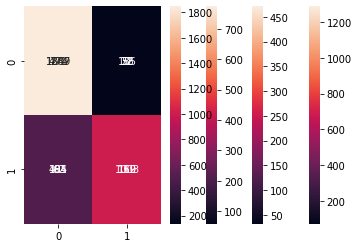

In [ ]:
## Get predictions and obtain scores and confusion matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("------------ON EARTHQUAKE DATA--------------")
predictions= clf.predict(x_test_uncorr_earthquake)
print(classification_report(y_test_earthquake['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_earthquake['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON FLOODS DATA--------------")
predictions= clf.predict(x_test_uncorr_floods)
print(classification_report(y_test_floods['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_floods['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON HURRICANE DATA--------------")
predictions= clf.predict(x_test_uncorr_hurricane)
print(classification_report(y_test_hurricane['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_hurricane['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON COMBINED DATA--------------")
predictions= clf.predict(x_test_uncorr_combined)
print(classification_report(y_test_combined['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_combined['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

##Model Trained on Combined Data

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])
def get_encoding_per_tweet(tweet):
  encoding=[]
  tweet=tweet.lower()

  # TWEET RELATED TO EARTHQUAKE
  if "earthquake" in tweet:
    encoding.append(1)
  else:
    encoding.append(0)

  # TWEETS RELATED TO INJURIES AND DEATHS
  if "death" in tweet and "toll" in tweet or 'victim' in tweet or "injur" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  encoding.append(get_vader_score(tweet))

  if "dozens" in tweet or "thousands" in tweet or  "hundreds" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding

  #TWEETS RELATED TO MISSING OR MISPLACED PEOPLE
  if "miss" in tweet or "evacuat" in tweet or "displac" in tweet or "lost" in tweet or "relocat" in tweet :
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  
  #TWEETS THAT TALK ABOUT FIRES AND TSUNAMI
  if "fire" in tweet or "tsunami" in tweet:
    encoding.append(1) # Can call another function in place of "0" which will give first encoding
  else:
    encoding.append(0) # Can call another function in place of "1" which will give second encoding
  
  return encoding


## Get Encodings for all tweets [train or test, whichever supplied]
def get_encoding_for_data(data):
  X=[]
  # Get encoding for each tweet in the data(set of tweets)
  for tweet_id,tweet in zip(data['id'],data['tweets']):
    X.append(get_encoding_per_tweet(tweet))
  return X



X_train_combined['tweets'] = X_train_combined['tweets'].apply(lambda x: str(x).lower())
X_test_earthquake['tweets'] = X_test_earthquake['tweets'].apply(lambda x:x.lower())
X_test_floods['tweets'] = X_test_floods['tweets'].apply(lambda x:x.lower())
X_test_hurricane['tweets'] = X_test_hurricane['tweets'].apply(lambda x:x.lower())
X_test_combined['tweets'] = X_test_combined['tweets'].apply(lambda x:x.lower())


def remove_stopwords(tweet, stopwords_list):
  tweet = tweet.split()
  fin_list = []
  for word in tweet:
    if word not in stopwords_list:
      fin_list.append(word)
  
  updated_sent = " "
  updated_sent = updated_sent.join(fin_list)
  return updated_sent

def pos_selection(tweet):
  pos_list=pos(tweet)
  tweet = tweet.split()
  fin_list = []
  for tag,word in zip(pos_list,tweet):
    if "VB" in tag or "JJ" in tag or "RB" in tag or "NN" in tag:
      if "NNP" not in tag: 
        fin_list.append(word)
  
  updated_sent = " "
  updated_sent = updated_sent.join(fin_list)
  return updated_sent


X_train_combined['tweets'] = X_train_combined['tweets'].apply(lambda x: pos_selection(x))
X_test_earthquake['tweets'] = X_test_earthquake['tweets'].apply(lambda x:pos_selection(x))
X_test_floods['tweets'] = X_test_floods['tweets'].apply(lambda x:pos_selection(x))
X_test_hurricane['tweets'] = X_test_hurricane['tweets'].apply(lambda x:pos_selection(x))
X_test_combined['tweets'] = X_test_combined['tweets'].apply(lambda x:pos_selection(x))

# tweets['tweets'] = tweets['tweets'].apply(lambda x: pos_selection(x))
# tweets['tweets'] = tweets['tweets'].apply(lambda x: remove_stopwords(x,lst_stopwords))
# test_tweets['tweets'] = test_tweets['tweets'].apply(lambda x: remove_stopwords(x,lst_stopwords))



from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2,max_df=0.5, ngram_range=(1,3))
model=tfidf.fit(X_train_combined['tweets'])
features=model.transform(X_train_combined['tweets'])
features_test_earthquake=model.transform(X_test_earthquake['tweets'])
features_test_floods=model.transform(X_test_floods['tweets'])
features_test_hurricane=model.transform(X_test_hurricane['tweets'])
features_test_combined=model.transform(X_test_combined['tweets'])

x_train=features
x_test_earthquake=features_test_earthquake
x_test_floods=features_test_floods
x_test_hurricane=features_test_hurricane
x_test_combined=features_test_combined


# x_new_test=model.transform(test_tweets['tweets'])


# REMOVING LOW VARIANCE FEATURES
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold = 0.0002)
constant_filter.fit(x_train)
# feature_list = x_train
# print('Number of selected features: ' ,len(list(feature_list)),'\n')
# print('List of selected features: \n' ,list(feature_list))


x_train_filter = constant_filter.transform(x_train)
x_test_filter_earthquake = constant_filter.transform(x_test_earthquake)
x_test_filter_floods = constant_filter.transform(x_test_floods)
x_test_filter_hurricane = constant_filter.transform(x_test_hurricane)
x_test_filter_combined = constant_filter.transform(x_test_combined)

# x_new_test_filter = constant_filter.transform(x_new_test)
# x_train_filter.shape, x_test_filter.shape, x_train.shape,x_new_test_filter.shape

x_train_filter = pd.DataFrame(x_train_filter.toarray())
x_test_filter_earthquake = pd.DataFrame(x_test_filter_earthquake.toarray())
x_test_filter_floods = pd.DataFrame(x_test_filter_floods.toarray())
x_test_filter_hurricane = pd.DataFrame(x_test_filter_hurricane.toarray())
x_test_filter_combined = pd.DataFrame(x_test_filter_combined.toarray())


# x_new_test_filter = pd.DataFrame(x_new_test_filter.toarray())


def get_correlation(data, threshold):
    corr_col = set()
    cormat = data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j]) > threshold:
                colname = cormat.columns[i]
                corr_col.add(colname)
    return corr_col
corr_features = get_correlation(x_train_filter, 0.70)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
x_train_uncorr = x_train_filter.drop(labels= corr_features, axis = 1)
x_test_uncorr_earthquake = x_test_filter_earthquake.drop(labels= corr_features, axis = 1)
x_test_uncorr_floods = x_test_filter_floods.drop(labels= corr_features, axis = 1)
x_test_uncorr_hurricane = x_test_filter_hurricane.drop(labels= corr_features, axis = 1)
x_test_uncorr_combined = x_test_filter_combined.drop(labels= corr_features, axis = 1)

# x_new_test_uncorr = x_new_test_filter.drop(labels= corr_features, axis = 1)

x_train_uncorr = pd.DataFrame(x_train_uncorr)
x_test_uncorr_earthquake = pd.DataFrame(x_test_uncorr_earthquake)
x_test_uncorr_floods = pd.DataFrame(x_test_uncorr_floods)
x_test_uncorr_hurricane = pd.DataFrame(x_test_uncorr_hurricane)
x_test_uncorr_combined = pd.DataFrame(x_test_uncorr_combined)

# x_new_test_uncorr = pd.DataFrame(x_new_test_uncorr)
# x_train_uncorr.shape, x_test_uncorr.shape, x_new_test_uncorr.shape

In [ ]:
x_train_uncorr=pd.concat([x_train_uncorr,pd.DataFrame(get_encoding_for_data(X_train_combined),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_earthquake=pd.concat([x_test_uncorr_earthquake,pd.DataFrame(get_encoding_for_data(X_test_earthquake),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_floods=pd.concat([x_test_uncorr_floods,pd.DataFrame(get_encoding_for_data(X_test_floods),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_hurricane=pd.concat([x_test_uncorr_hurricane,pd.DataFrame(get_encoding_for_data(X_test_hurricane),columns=['a','b','c','d','e','f'])],axis=1)
x_test_uncorr_combined=pd.concat([x_test_uncorr_combined,pd.DataFrame(get_encoding_for_data(X_test_combined),columns=['a','b','c','d','e','f'])],axis=1)



In [ ]:
## Train with SVM
from sklearn import svm
# Can be used to get a rough estimate of score, later we use grid search to find better parameters
clf = svm.SVC(cache_size=10000,class_weight="balanced")
# Fit over encodings and labels(binary labels) of the data
clf.fit(x_train_uncorr, y_train_combined["label"]) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC(cache_size=10000, class_weight='balanced')

------------ON EARTHQUAKE DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.9548    0.9154    0.9347      1360
           1     0.7118    0.8280    0.7655       343

    accuracy                         0.8978      1703
   macro avg     0.8333    0.8717    0.8501      1703
weighted avg     0.9058    0.8978    0.9006      1703

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON FLOODS DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8444    0.9384    0.8889       503
           1     0.8050    0.5953    0.6845       215

    accuracy                         0.8357       718
   macro avg     0.8247    0.7669    0.7867       718
weighted avg     0.8326    0.8357    0.8277       718

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON HURRICANE DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.9333    0.9411    0.9372       832
           1     0.7742    0.7500    0.7619       224

    accuracy                         0.9006      1056
   macro avg     0.8537    0.8456    0.8495      1056
weighted avg     0.8995    0.9006    0.9000      1056

X-axis: Obtained Labels Y-axis: Actual Labels
------------ON COMBINED DATA--------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0     0.8006    0.9299    0.8604      1982
           1     0.8816    0.6928    0.7759      1494

    accuracy                         0.8280      3476
   macro avg     0.8411    0.8113    0.8181      3476
weighted avg     0.8354    0.8280    0.8241      3476

X-axis: Obtained Labels Y-axis: Actual Labels


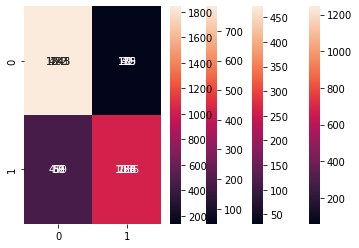

In [ ]:
## Get predictions and obtain scores and confusion matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("------------ON EARTHQUAKE DATA--------------")
predictions= clf.predict(x_test_uncorr_earthquake)
print(classification_report(y_test_earthquake['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_earthquake['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON FLOODS DATA--------------")
predictions= clf.predict(x_test_uncorr_floods)
print(classification_report(y_test_floods['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_floods['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON HURRICANE DATA--------------")
predictions= clf.predict(x_test_uncorr_hurricane)
print(classification_report(y_test_hurricane['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_hurricane['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")

print("------------ON COMBINED DATA--------------")
predictions= clf.predict(x_test_uncorr_combined)
print(classification_report(y_test_combined['label'], predictions,digits=4))
cf_matrix = confusion_matrix(y_test_combined['label'], predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("X-axis: Obtained Labels Y-axis: Actual Labels")